# Библиотеки и настройка cuda

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [3]:
from ultralytics import YOLO

In [4]:
import cv2

In [5]:
import torch

print(torch.cuda.is_available())
print(torch.cuda.get_device_name())

True
NVIDIA GeForce RTX 2080 SUPER


# Модуль Б. Разработка модели машинного обучения 

Поставленную задачу можно разбить на две: детекцию лиц и идентификацию детектируемого лица, -> для решения нужно использовать две модели:

>-- модель детекции
>
>-- модель распознавания лиц

Для детекции были выбраны модели YOLO, так как они 

## Алгоритмы для детекции

### ёла  10

In [5]:
# инициализация модели
model_yolo10 = YOLO('yolov10n.yaml')

# обучение модели
model_yolo10.train(data='data_rec.yaml', epochs = 3, imgsz=640, batch = 16, name = 'variant_one')

Ultralytics 8.3.65  Python-3.11.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov10n.yaml, data=data_rec.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=variant_one7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 3.83MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytics

YOLOv10n summary: 385 layers, 2,707,430 parameters, 2,707,414 gradients, 8.4 GFLOPs

Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 6.48MB/s]


AMP: checks passed 


train: Scanning C:\Users\user2\Downloads\hw\rec_data\train\labels... 833 images, 0 backgrounds, 0 corrupt: 100%|██████████| 833/833 [00:02<00:00, 341.19it/s]


train: New cache created: C:\Users\user2\Downloads\hw\rec_data\train\labels.cache


val: Scanning C:\Users\user2\Downloads\hw\rec_data\valid\labels... 147 images, 0 backgrounds, 0 corrupt: 100%|██████████| 147/147 [00:00<00:00, 241.63it/s]

val: New cache created: C:\Users\user2\Downloads\hw\rec_data\valid\labels.cache


Plotting labels to c:\Users\user2\Downloads\hw\runs\detect\variant_one7\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 6 dataloader workers
Logging results to c:\Users\user2\Downloads\hw\runs\detect\variant_one7
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      3.01G      5.803      11.67      8.309          3        640: 100%|██████████| 53/53 [00:12<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.83it/s]

                   all        147        167    0.00277      0.731     0.0024    0.00103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      3.04G      5.505      9.637      7.377          5        640: 100%|██████████| 53/53 [00:11<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.36it/s]

                   all        147        167    0.00272      0.719     0.0138    0.00401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      3.04G          5      8.194      6.386          4        640: 100%|██████████| 53/53 [00:11<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.90it/s]


                   all        147        167      0.235     0.0898     0.0993     0.0488

3 epochs completed in 0.011 hours.
Optimizer stripped from c:\Users\user2\Downloads\hw\runs\detect\variant_one7\weights\last.pt, 5.7MB
Optimizer stripped from c:\Users\user2\Downloads\hw\runs\detect\variant_one7\weights\best.pt, 5.7MB

Validating c:\Users\user2\Downloads\hw\runs\detect\variant_one7\weights\best.pt...
Ultralytics 8.3.65  Python-3.11.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 8192MiB)
YOLOv10n summary (fused): 285 layers, 2,694,806 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.31it/s]


                   all        147        167      0.247     0.0898     0.0987     0.0488
Speed: 0.5ms preprocess, 2.6ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to c:\Users\user2\Downloads\hw\runs\detect\variant_one7


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001A42A0F3E10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [6]:
# другие параметры
model_yolo10.train(data='data_rec.yaml', epochs = 8, imgsz=640, batch = -1, name = 'variant_two')

Ultralytics 8.3.65  Python-3.11.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov10n.yaml, data=data_rec.yaml, epochs=8, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=variant_two, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

train: Scanning C:\Users\user2\Downloads\hw\rec_data\train\labels.cache... 833 images, 0 backgrounds, 0 corrupt: 100%|██████████| 833/833 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 2080 SUPER) 8.00G total, 0.18G reserved, 0.14G allocated, 7.69G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


     2707430       8.393         0.528         35.88           nan        (1, 3, 640, 640)                    list
     2707430       16.79         0.992         87.77           nan        (2, 3, 640, 640)                    list
     2707430       33.57         1.829         33.89           nan        (4, 3, 640, 640)                    list
     2707430       67.14         3.420         36.24           nan        (8, 3, 640, 640)                    list
     2707430       134.3         6.514         54.88           nan       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 11 for CUDA:0 4.91G/8.00G (61%) 


train: Scanning C:\Users\user2\Downloads\hw\rec_data\train\labels.cache... 833 images, 0 backgrounds, 0 corrupt: 100%|██████████| 833/833 [00:00<?, ?it/s]
val: Scanning C:\Users\user2\Downloads\hw\rec_data\valid\labels.cache... 147 images, 0 backgrounds, 0 corrupt: 100%|██████████| 147/147 [00:00<?, ?it/s]


Plotting labels to c:\Users\user2\Downloads\hw\runs\detect\variant_two\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.000515625), 107 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 6 dataloader workers
Logging results to c:\Users\user2\Downloads\hw\runs\detect\variant_two
Starting training for 8 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/8      2.06G      4.493       7.28      5.862         16        640: 100%|██████████| 76/76 [00:16<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.93it/s]

                   all        147        167      0.451     0.0299       0.17     0.0836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/8      2.07G      3.917       5.91      5.135         35        640: 100%|██████████| 76/76 [00:12<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.98it/s]

                   all        147        167      0.354      0.401      0.291      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/8      2.05G      3.701      5.073      4.716         21        640: 100%|██████████| 76/76 [00:12<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.39it/s]


                   all        147        167      0.525      0.477      0.499      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/8      2.05G       3.38      4.439      4.346         19        640: 100%|██████████| 76/76 [00:12<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.00it/s]

                   all        147        167      0.529      0.461      0.488      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/8      2.06G       3.15       3.96      4.156         25        640: 100%|██████████| 76/76 [00:12<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.47it/s]

                   all        147        167      0.675      0.609       0.68      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/8      2.05G      3.018      3.622          4         24        640: 100%|██████████| 76/76 [00:12<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.56it/s]


                   all        147        167      0.598      0.641      0.665      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        7/8      2.05G      2.821      3.278      3.811         20        640: 100%|██████████| 76/76 [00:13<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.77it/s]


                   all        147        167      0.735      0.746      0.765      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        8/8      2.04G      2.718      3.096      3.703         16        640: 100%|██████████| 76/76 [00:12<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.74it/s]


                   all        147        167      0.809      0.701      0.804      0.575

8 epochs completed in 0.033 hours.
Optimizer stripped from c:\Users\user2\Downloads\hw\runs\detect\variant_two\weights\last.pt, 5.7MB
Optimizer stripped from c:\Users\user2\Downloads\hw\runs\detect\variant_two\weights\best.pt, 5.7MB

Validating c:\Users\user2\Downloads\hw\runs\detect\variant_two\weights\best.pt...
Ultralytics 8.3.65  Python-3.11.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 8192MiB)
YOLOv10n summary (fused): 285 layers, 2,694,806 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.76it/s]


                   all        147        167      0.808      0.701      0.804      0.575
Speed: 0.3ms preprocess, 3.0ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to c:\Users\user2\Downloads\hw\runs\detect\variant_two


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001A42A025050>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [7]:
model_yolo10.train(data='data_rec.yaml', epochs = 16, imgsz=640, batch = -1, name = 'variant_three')

Ultralytics 8.3.65  Python-3.11.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov10n.yaml, data=data_rec.yaml, epochs=16, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=variant_three, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

train: Scanning C:\Users\user2\Downloads\hw\rec_data\train\labels.cache... 833 images, 0 backgrounds, 0 corrupt: 100%|██████████| 833/833 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 2080 SUPER) 8.00G total, 0.25G reserved, 0.14G allocated, 7.61G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


     2707430       8.393         0.533         37.93           nan        (1, 3, 640, 640)                    list
     2707430       16.79         1.015         90.78           nan        (2, 3, 640, 640)                    list
     2707430       33.57         1.852         80.78           nan        (4, 3, 640, 640)                    list
     2707430       67.14         3.454         38.66           nan        (8, 3, 640, 640)                    list
     2707430       134.3         6.554         69.81           nan       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 11 for CUDA:0 5.03G/8.00G (63%) 


train: Scanning C:\Users\user2\Downloads\hw\rec_data\train\labels.cache... 833 images, 0 backgrounds, 0 corrupt: 100%|██████████| 833/833 [00:00<?, ?it/s]
val: Scanning C:\Users\user2\Downloads\hw\rec_data\valid\labels.cache... 147 images, 0 backgrounds, 0 corrupt: 100%|██████████| 147/147 [00:00<?, ?it/s]


Plotting labels to c:\Users\user2\Downloads\hw\runs\detect\variant_three\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.000515625), 107 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 6 dataloader workers
Logging results to c:\Users\user2\Downloads\hw\runs\detect\variant_three
Starting training for 16 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/16      2.06G      2.739      3.168      3.726         16        640: 100%|██████████| 76/76 [00:17<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.21it/s]


                   all        147        167      0.809      0.684        0.8      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/16      2.07G      2.781      2.988      3.713         35        640: 100%|██████████| 76/76 [00:12<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.32it/s]

                   all        147        167      0.773      0.672      0.773      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/16      2.05G      2.776      2.823      3.703         21        640: 100%|██████████| 76/76 [00:11<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.36it/s]

                   all        147        167      0.715      0.754      0.792      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/16      2.05G      2.666      2.674       3.58         19        640: 100%|██████████| 76/76 [00:12<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.62it/s]

                   all        147        167      0.731      0.713       0.77      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/16      2.07G      2.577      2.493      3.499         25        640: 100%|██████████| 76/76 [00:12<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.47it/s]

                   all        147        167      0.791       0.75      0.848      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/16      2.05G      2.512      2.369      3.434         24        640: 100%|██████████| 76/76 [00:12<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.82it/s]

                   all        147        167      0.815      0.731      0.851      0.644


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/16      2.06G      2.052      1.865      3.297          9        640: 100%|██████████| 76/76 [00:13<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.27it/s]

                   all        147        167      0.806      0.754      0.849      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/16      2.05G      1.872       1.58      3.081          9        640: 100%|██████████| 76/76 [00:11<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.69it/s]

                   all        147        167      0.805      0.838      0.871      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/16      2.06G      1.896      1.419      3.048         10        640: 100%|██████████| 76/76 [00:12<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]

                   all        147        167      0.885      0.783      0.897      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/16      2.05G      1.822      1.366      3.016          8        640: 100%|██████████| 76/76 [00:12<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.72it/s]

                   all        147        167      0.876      0.844      0.905       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/16      2.05G      1.743      1.333      2.941         11        640: 100%|██████████| 76/76 [00:12<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.44it/s]

                   all        147        167      0.853      0.808      0.903      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/16      2.05G      1.667      1.201      2.836          8        640: 100%|██████████| 76/76 [00:12<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]

                   all        147        167      0.938      0.778      0.911      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/16      2.06G      1.601      1.181      2.802          8        640: 100%|██████████| 76/76 [00:12<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.84it/s]

                   all        147        167      0.918      0.807      0.923      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/16      2.05G      1.587      1.145      2.774         10        640: 100%|██████████| 76/76 [00:12<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.62it/s]

                   all        147        167      0.898      0.796      0.907       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/16      2.06G      1.528      1.098      2.678          9        640: 100%|██████████| 76/76 [00:12<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.40it/s]

                   all        147        167      0.926      0.828       0.93      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/16      2.06G      1.454       1.05      2.621          8        640: 100%|██████████| 76/76 [00:12<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.24it/s]

                   all        147        167      0.845      0.846      0.919      0.749



16 epochs completed in 0.071 hours.
Optimizer stripped from c:\Users\user2\Downloads\hw\runs\detect\variant_three\weights\last.pt, 5.7MB
Optimizer stripped from c:\Users\user2\Downloads\hw\runs\detect\variant_three\weights\best.pt, 5.7MB

Validating c:\Users\user2\Downloads\hw\runs\detect\variant_three\weights\best.pt...
Ultralytics 8.3.65  Python-3.11.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 8192MiB)
YOLOv10n summary (fused): 285 layers, 2,694,806 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.09it/s]


                   all        147        167      0.926      0.828      0.929      0.751
Speed: 0.3ms preprocess, 3.1ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to c:\Users\user2\Downloads\hw\runs\detect\variant_three


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001A45064C610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

### ёла 8

In [4]:
# инициализация модели
model_yolo8 = YOLO('yolov8n.yaml')

# обучение модели
model_yolo8.train(data = 'data_rec.yaml', epochs = 12, imgsz = 640, batch = 0.8, name = 'v_one')

Ultralytics 8.3.65  Python-3.11.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=data_rec.yaml, epochs=12, time=None, patience=100, batch=0.8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=v_one, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

train: Scanning C:\Users\user2\Downloads\hw\rec_data\train\labels.cache... 833 images, 0 backgrounds, 0 corrupt: 100%|██████████| 833/833 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 80.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 2080 SUPER) 8.00G total, 0.10G reserved, 0.06G allocated, 7.84G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


     3011043       8.194         0.281         28.69         141.8        (1, 3, 640, 640)                    list
     3011043       16.39         0.409         13.51         46.78        (2, 3, 640, 640)                    list
     3011043       32.78         0.661         13.03         49.18        (4, 3, 640, 640)                    list
     3011043       65.55         1.153         16.27         43.89        (8, 3, 640, 640)                    list
     3011043       131.1         2.183         31.13         50.38       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 74 for CUDA:0 6.41G/8.00G (80%) 


train: Scanning C:\Users\user2\Downloads\hw\rec_data\train\labels.cache... 833 images, 0 backgrounds, 0 corrupt: 100%|██████████| 833/833 [00:00<?, ?it/s]
val: Scanning C:\Users\user2\Downloads\hw\rec_data\valid\labels.cache... 147 images, 0 backgrounds, 0 corrupt: 100%|██████████| 147/147 [00:00<?, ?it/s]


Plotting labels to c:\Users\user2\Downloads\hw\runs\detect\v_one\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000578125), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 6 dataloader workers
Logging results to c:\Users\user2\Downloads\hw\runs\detect\v_one
Starting training for 12 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/12      9.23G      3.054      3.583      4.191         39        640: 100%|██████████| 12/12 [00:28<00:00,  2.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.40s/it]

                   all        147        167    0.00317      0.838     0.0124     0.0039



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/12      9.18G      2.991      3.394      4.053         46        640: 100%|██████████| 12/12 [00:25<00:00,  2.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.27s/it]

                   all        147        167    0.00317      0.838     0.0219    0.00739


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/12      9.18G      2.256        3.4      3.622         22        640: 100%|██████████| 12/12 [00:27<00:00,  2.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.51s/it]

                   all        147        167    0.00315      0.832     0.0297    0.00944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/12      9.18G      1.968      3.045      3.143         21        640: 100%|██████████| 12/12 [00:22<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.49s/it]

                   all        147        167    0.00315      0.832     0.0818     0.0232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/12      9.18G      1.904      2.736        2.9         21        640: 100%|██████████| 12/12 [00:22<00:00,  1.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.74s/it]

                   all        147        167    0.00311       0.82      0.337      0.066



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/12      9.24G      1.777      2.418      2.697         21        640: 100%|██████████| 12/12 [00:27<00:00,  2.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.71s/it]

                   all        147        167    0.00306      0.808      0.322     0.0747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/12      9.18G      1.567      2.072       2.44         20        640: 100%|██████████| 12/12 [00:21<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.62s/it]

                   all        147        167    0.00313      0.826     0.0211    0.00503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/12      9.24G      1.494      1.801      2.331         19        640: 100%|██████████| 12/12 [00:22<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.59s/it]

                   all        147        167      0.741      0.137      0.412     0.0959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/12      9.18G      1.391      1.612      2.185         24        640: 100%|██████████| 12/12 [00:20<00:00,  1.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.81s/it]

                   all        147        167       0.63      0.184      0.357     0.0776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/12      9.24G      1.317      1.405      2.087         23        640: 100%|██████████| 12/12 [00:22<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.50s/it]

                   all        147        167      0.525      0.357       0.33     0.0716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/12      9.24G      1.247      1.272      2.017         21        640: 100%|██████████| 12/12 [00:22<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.11s/it]

                   all        147        167      0.651      0.491      0.483      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/12      9.18G       1.18      1.201      1.934         19        640: 100%|██████████| 12/12 [01:58<00:00,  9.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.12s/it]

                   all        147        167      0.823      0.551      0.599      0.252



12 epochs completed in 0.132 hours.
Optimizer stripped from c:\Users\user2\Downloads\hw\runs\detect\v_one\weights\last.pt, 6.2MB
Optimizer stripped from c:\Users\user2\Downloads\hw\runs\detect\v_one\weights\best.pt, 6.2MB

Validating c:\Users\user2\Downloads\hw\runs\detect\v_one\weights\best.pt...
Ultralytics 8.3.65  Python-3.11.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 8192MiB)
YOLOv8n summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                   all        147        167      0.826      0.551      0.599      0.253
Speed: 0.5ms preprocess, 2.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to c:\Users\user2\Downloads\hw\runs\detect\v_one


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000019FB2D8FD90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [5]:
# инициализация модели
model_yolo8s = YOLO('yolov8s.yaml')

# обучение модели
model_yolo8s.train(data = 'data_rec.yaml', epochs = 16, imgsz = 640, batch = 0.65, name = 'v_two_s')

Ultralytics 8.3.65  Python-3.11.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.yaml, data=data_rec.yaml, epochs=16, time=None, patience=100, batch=0.65, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=v_two_s, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

train: Scanning C:\Users\user2\Downloads\hw\rec_data\train\labels.cache... 833 images, 0 backgrounds, 0 corrupt: 100%|██████████| 833/833 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 65.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 2080 SUPER) 8.00G total, 0.60G reserved, 0.17G allocated, 7.23G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


    11135987       28.65         1.376         55.99         61.35        (1, 3, 640, 640)                    list
    11135987       57.29         1.359         26.68         31.18        (2, 3, 640, 640)                    list
    11135987       114.6         1.678         29.47         29.18        (4, 3, 640, 640)                    list
    11135987       229.2         2.600         29.65         46.69        (8, 3, 640, 640)                    list
    11135987       458.4         4.094         62.66         64.78       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 33 for CUDA:0 5.46G/8.00G (68%) 


train: Scanning C:\Users\user2\Downloads\hw\rec_data\train\labels.cache... 833 images, 0 backgrounds, 0 corrupt: 100%|██████████| 833/833 [00:00<?, ?it/s]
val: Scanning C:\Users\user2\Downloads\hw\rec_data\valid\labels.cache... 147 images, 0 backgrounds, 0 corrupt: 100%|██████████| 147/147 [00:00<?, ?it/s]


Plotting labels to c:\Users\user2\Downloads\hw\runs\detect\v_two_s\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000515625), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 6 dataloader workers
Logging results to c:\Users\user2\Downloads\hw\runs\detect\v_two_s
Starting training for 16 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/16      7.42G      3.054      3.442      4.058         19        640: 100%|██████████| 26/26 [00:12<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.70s/it]

                   all        147        167    0.00315      0.832     0.0129    0.00461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/16       7.5G      2.616      2.948      3.457         21        640: 100%|██████████| 26/26 [00:13<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]

                   all        147        167     0.0242      0.725     0.0746     0.0324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/16       7.5G      2.289      2.456      2.986         21        640: 100%|██████████| 26/26 [00:15<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.08it/s]


                   all        147        167     0.0137      0.731      0.017    0.00618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/16       7.5G      2.091      2.193      2.756         27        640: 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]


                   all        147        167      0.216      0.222      0.158     0.0571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/16      7.83G       1.95      2.011      2.579         16        640: 100%|██████████| 26/26 [00:15<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        147        167      0.127      0.413        0.1     0.0405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/16      7.83G      1.797      1.766      2.427         18        640: 100%|██████████| 26/26 [00:15<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        147        167      0.372      0.551      0.353      0.158


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/16      7.83G      1.448      1.531      2.295          9        640: 100%|██████████| 26/26 [00:22<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.05s/it]

                   all        147        167      0.897      0.689      0.804       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/16       7.5G      1.309      1.198      2.082          9        640: 100%|██████████| 26/26 [00:13<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.01s/it]

                   all        147        167      0.957      0.798      0.917      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/16      7.83G      1.192      1.037      1.933         10        640: 100%|██████████| 26/26 [00:10<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.34it/s]

                   all        147        167      0.898      0.856      0.918      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/16      7.83G      1.135     0.9161       1.87          8        640: 100%|██████████| 26/26 [00:10<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]

                   all        147        167      0.981      0.731      0.892      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/16       7.5G      1.054     0.8403      1.798         11        640: 100%|██████████| 26/26 [00:09<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.07it/s]

                   all        147        167      0.916      0.846      0.927      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/16       7.5G      1.019     0.7738      1.748          8        640: 100%|██████████| 26/26 [00:11<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]

                   all        147        167      0.949      0.891      0.942      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/16      7.51G     0.9809     0.7474      1.692          8        640: 100%|██████████| 26/26 [00:09<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.08it/s]

                   all        147        167      0.943      0.893      0.945      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/16       7.5G     0.9375     0.6839      1.657         10        640: 100%|██████████| 26/26 [00:09<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.31it/s]

                   all        147        167      0.955      0.892      0.943      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/16       7.5G     0.9126     0.6718      1.606          9        640: 100%|██████████| 26/26 [00:09<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        147        167       0.96      0.898      0.948       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/16       7.5G     0.8741     0.6304      1.577          8        640: 100%|██████████| 26/26 [00:09<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]

                   all        147        167      0.972       0.91      0.953      0.738



16 epochs completed in 0.084 hours.
Optimizer stripped from c:\Users\user2\Downloads\hw\runs\detect\v_two_s\weights\last.pt, 22.5MB
Optimizer stripped from c:\Users\user2\Downloads\hw\runs\detect\v_two_s\weights\best.pt, 22.5MB

Validating c:\Users\user2\Downloads\hw\runs\detect\v_two_s\weights\best.pt...
Ultralytics 8.3.65  Python-3.11.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 8192MiB)
YOLOv8s summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]


                   all        147        167      0.972       0.91      0.953      0.739
Speed: 0.5ms preprocess, 4.6ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to c:\Users\user2\Downloads\hw\runs\detect\v_two_s


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000019FB1788310>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [6]:
model_yolo8s.train(data = 'data_rec.yaml', epochs = 20, imgsz = 640, batch = 0.7, name = 'v_3_s')

Ultralytics 8.3.65  Python-3.11.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.yaml, data=data_rec.yaml, epochs=20, time=None, patience=100, batch=0.7, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=v_3_s, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

train: Scanning C:\Users\user2\Downloads\hw\rec_data\train\labels.cache... 833 images, 0 backgrounds, 0 corrupt: 100%|██████████| 833/833 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 70.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 2080 SUPER) 8.00G total, 1.01G reserved, 0.33G allocated, 6.66G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


    11135987       28.65         1.439         123.5         10.04        (1, 3, 640, 640)                    list
    11135987       57.29         1.424         23.86         15.64        (2, 3, 640, 640)                    list
    11135987       114.6         1.793         20.68         13.51        (4, 3, 640, 640)                    list
    11135987       229.2         2.619         34.32         31.13        (8, 3, 640, 640)                    list
    11135987       458.4         4.159         79.78          59.4       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 32 for CUDA:0 6.02G/8.00G (75%) 


train: Scanning C:\Users\user2\Downloads\hw\rec_data\train\labels.cache... 833 images, 0 backgrounds, 0 corrupt: 100%|██████████| 833/833 [00:00<?, ?it/s]
val: Scanning C:\Users\user2\Downloads\hw\rec_data\valid\labels.cache... 147 images, 0 backgrounds, 0 corrupt: 100%|██████████| 147/147 [00:00<?, ?it/s]


Plotting labels to c:\Users\user2\Downloads\hw\runs\detect\v_3_s\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 6 dataloader workers
Logging results to c:\Users\user2\Downloads\hw\runs\detect\v_3_s
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      7.59G      1.576      1.584      2.135          1        640: 100%|██████████| 27/27 [00:13<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:11<00:00,  3.70s/it]

                   all        147        167      0.921      0.904      0.931      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      7.68G      1.446      1.223      2.073          7        640: 100%|██████████| 27/27 [00:11<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.22it/s]

                   all        147        167      0.902      0.878      0.933       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       7.7G      1.389      1.163      2.013          2        640: 100%|██████████| 27/27 [00:11<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]

                   all        147        167      0.946      0.808      0.902      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      7.72G      1.379      1.144      1.988          1        640: 100%|██████████| 27/27 [00:11<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.42it/s]

                   all        147        167      0.865      0.765       0.83      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       7.7G       1.29      1.071      1.912          3        640: 100%|██████████| 27/27 [00:11<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all        147        167      0.935      0.886      0.942      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      7.76G       1.28      1.047      1.883          4        640: 100%|██████████| 27/27 [00:15<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]

                   all        147        167      0.968       0.91      0.952      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      7.66G      1.198     0.9313      1.795          1        640: 100%|██████████| 27/27 [00:11<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]

                   all        147        167      0.974      0.915      0.959      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      7.72G      1.171     0.9195       1.76          2        640: 100%|██████████| 27/27 [00:11<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]

                   all        147        167      0.955       0.88      0.941      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      7.71G      1.157     0.8992      1.745          1        640: 100%|██████████| 27/27 [00:16<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]

                   all        147        167      0.985      0.928      0.955      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      7.72G        1.1     0.8146      1.701          2        640: 100%|██████████| 27/27 [00:10<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.08s/it]

                   all        147        167      0.963      0.934      0.955      0.748


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      7.66G     0.8837     0.6647       1.55          1        640: 100%|██████████| 27/27 [00:14<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.24it/s]

                   all        147        167      0.975      0.926      0.956      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      7.71G     0.8861     0.5811       1.54          1        640: 100%|██████████| 27/27 [00:10<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.34it/s]

                   all        147        167      0.979      0.898      0.953      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      7.67G     0.8341     0.5792      1.492          1        640: 100%|██████████| 27/27 [00:09<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]

                   all        147        167      0.954      0.904       0.95      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      7.71G     0.8324     0.5607      1.488          1        640: 100%|██████████| 27/27 [00:10<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]

                   all        147        167      0.963      0.937      0.957      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      7.66G     0.7927     0.5337      1.444          2        640: 100%|██████████| 27/27 [00:10<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.24it/s]

                   all        147        167      0.975      0.934      0.965      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      7.72G     0.7591     0.4924      1.415          1        640: 100%|██████████| 27/27 [00:11<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]

                   all        147        167          1      0.944      0.963       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      7.34G     0.7368     0.4832      1.405          1        640: 100%|██████████| 27/27 [00:09<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.91s/it]

                   all        147        167       0.99      0.934       0.96      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      7.72G      0.751     0.4699      1.382          1        640: 100%|██████████| 27/27 [00:13<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.12s/it]

                   all        147        167      0.998      0.934      0.961      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      7.66G     0.7075     0.4509      1.355          1        640: 100%|██████████| 27/27 [00:11<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]

                   all        147        167      0.997      0.928      0.958       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      7.72G     0.6861     0.4374      1.346          1        640: 100%|██████████| 27/27 [00:14<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        147        167      0.998      0.934      0.961      0.787



20 epochs completed in 0.097 hours.
Optimizer stripped from c:\Users\user2\Downloads\hw\runs\detect\v_3_s\weights\last.pt, 22.5MB
Optimizer stripped from c:\Users\user2\Downloads\hw\runs\detect\v_3_s\weights\best.pt, 22.5MB

Validating c:\Users\user2\Downloads\hw\runs\detect\v_3_s\weights\best.pt...
Ultralytics 8.3.65  Python-3.11.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 8192MiB)
YOLOv8s summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]


                   all        147        167      0.998      0.934      0.961      0.787
Speed: 0.3ms preprocess, 4.7ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to c:\Users\user2\Downloads\hw\runs\detect\v_3_s


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000019FB1877290>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

тд тп короче ёла на 20ти эпохах круче всех и дальше будет она

### функции тестирования всякие мучения

ааааааа модели

In [5]:
# загрузка модели детекции
model_d = YOLO(r'runs\detect\variant_three\weights\best.pt') # лучше ёла 10

________________________________________________________________________________________________________________
проверка того что оно работает на фото из данных для идентификации:

In [8]:
test1 = model_d(r'id_data\valid\Michael_Jackson\Michael_Jackson_0010.jpg')


image 1/1 c:\projects\hw-face-rec-and-id\id_data\valid\Michael_Jackson\Michael_Jackson_0010.jpg: 640x640 1 face, 875.6ms
Speed: 32.4ms preprocess, 875.6ms inference, 17.4ms postprocess per image at shape (1, 3, 640, 640)


In [11]:
test1[0].show()

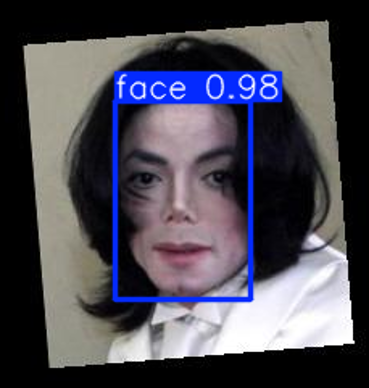

In [12]:
test2 = model_d(r'id_data\valid\Jennifer_Lopez\Jennifer_Lopez_0004.jpg')
test2[0].show()


image 1/1 c:\projects\hw-face-rec-and-id\id_data\valid\Jennifer_Lopez\Jennifer_Lopez_0004.jpg: 640x640 1 face, 166.6ms
Speed: 10.5ms preprocess, 166.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


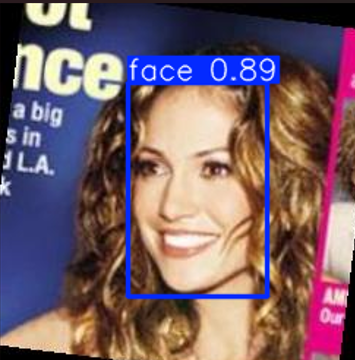

In [13]:
test3 = model_d(r'id_data\train\Britney_Spears\Britney_Spears_0008.jpg')
test3[0].show()


image 1/1 c:\projects\hw-face-rec-and-id\id_data\train\Britney_Spears\Britney_Spears_0008.jpg: 640x640 1 face, 144.2ms
Speed: 7.7ms preprocess, 144.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


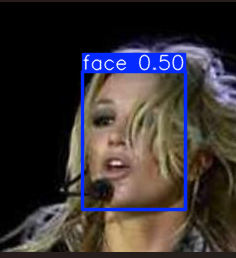

______________________________________________________________________________________________________________

In [8]:
# функция для детекции

def detection_face(model, f_path):
    photo = cv2.imread(f_path)
    
    # результат детекции
    res = model(photo)
    for r in res:
        print(len(r.boxes))
        for box in r.boxes:
            # получаем координаты результата детекции
            x1, y1, x2, y2 = map(int, box.xyxy[0])

            # выделяем область детекции на фото
            cv2.rectangle(photo, (x1, y1), (x2, y2), (0, 176, 65), 2)
    
    cv2.imshow('Result', photo)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
detection_face(model_v8_s20, r'04870.png')


0: 448x640 2 faces, 234.1ms
Speed: 0.0ms preprocess, 234.1ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)
2


KeyboardInterrupt: 

In [ ]:
# проверка работы функции
detection_face(model_d, r'id_data\train\Queen_Elizabeth_II\Queen_Elizabeth_II_0001.jpg')

____________________________________________________________________________________________________________
ёла 20 эпох ыаымыаыа проверка

In [6]:
model_v8_s20 = YOLO(r'runs\detect\v_3_s\weights\best.pt')

In [25]:
detection_face(model_v8_s20, r'rec_data\valid\images\09990.png')


0: 640x640 1 face, 242.3ms
Speed: 6.0ms preprocess, 242.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.8833], device='cuda:0')
data: tensor([[2.5588e+02, 1.8556e+02, 8.2214e+02, 9.1216e+02, 8.8328e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (1024, 1024)
shape: torch.Size([1, 6])
xywh: tensor([[539.0103, 548.8596, 566.2528, 726.6038]], device='cuda:0')
xywhn: tensor([[0.5264, 0.5360, 0.5530, 0.7096]], device='cuda:0')
xyxy: tensor([[255.8839, 185.5577, 822.1367, 912.1616]], device='cuda:0')
xyxyn: tensor([[0.2499, 0.1812, 0.8029, 0.8908]], device='cuda:0')


In [12]:
detection_face(model_v8_s20, r'id_data\train\Abdullah_Gul\Abdullah_Gul_0015.jpg')


0: 640x640 1 face, 298.3ms
Speed: 7.1ms preprocess, 298.3ms inference, 10.8ms postprocess per image at shape (1, 3, 640, 640)


## Алгоритмы для идентификации

In [54]:
from deepface import DeepFace
import os
import cv2

In [13]:
def creat_emb(dir):
    results = []
    for fold_name in os.listdir(dir):
        fold_name = os.path.join(dir, fold_name)
        if os.path.isdir(fold_name):
            for f_name in os.listdir(fold_name):
                f_path = os.path.join(fold_name, f_name)
                img = cv2.imread(f_path)
                res_img = model_v8_s20(img)
                if len(res_img[0].boxes) != 0:
                    for res in res_img:
                        for box in res.boxes:
                            x1, y1, x2, y2 = map(int, box.xyxy[0])
                            crop = img[y1:y2, x1:x2]
                            try:
                                embedding = DeepFace.represent(img_path = crop, model_name='VGG-Face')
                                # добавляем результат в лист
                                results.append({'folder_name': fold_name,
                                                'file_name': f_name,
                                                'f_path': f_path,
                                                'embedding': embedding})
                            except Exception as e:
                                print(f'ошибка, проблемы с эмбедингом: {e}')
                                results.append({'folder_name': None,
                                                'file_name': None,
                                                'f_path': None,
                                                'embedding': None})
                else: 
                    print('ошибка! проблема с детекцией')
                    results.append({'folder_name': None,
                                     'file_name': None,
                                     'f_path': None,
                                     'embedding': None})
    return results

In [59]:
import matplotlib.pyplot as plt

In [62]:
def creat_emb(dir):
    results = []
    for fold_name in os.listdir(dir):
        fold_name = os.path.join(dir, fold_name)
        if os.path.isdir(fold_name):
            for f_name in os.listdir(fold_name):
                f_path = os.path.join(fold_name, f_name)
                img = cv2.imread(f_path)
                res_img = model_v8_s20(img)
                if len(res_img[0].boxes) != 0:
                    for res in res_img:
                        for box in res.boxes:
                            x1, y1, x2, y2 = map(int, box.xyxy[0])
                            crop = img[y1:y2, x1:x2]
                            crop =cv2.cvtColor(crop, cv2.COLOR_BAYER_BGGR2RGB)
                            plt.figure(figsize=(5, 5))
                            plt.imshow(crop)
                            plt.title("Cropped Image")               # отображение обрезанной части картинки
                            plt.axis('off')
                            plt.show()
                            try:
                                embedding = DeepFace.represent(img_path = crop, model_name='VGG-Face')
                                # добавляем результат в лист
                                results.append({'folder_name': fold_name,
                                                'file_name': f_name,
                                                'f_path': f_path,
                                                'embedding': embedding})
                            except Exception as e:
                                print(f'ошибка, проблемы с эмбедингом: {e}')
                                results.append({'folder_name': None,
                                                'file_name': None,
                                                'f_path': None,
                                                'embedding': None})
                else: 
                    print('ошибка! проблема с детекцией')
                    results.append({'folder_name': None,
                                     'file_name': None,
                                     'f_path': None,
                                     'embedding': None})
    return results
train_fold = r'id_data\train'
creat_emb(train_fold)


0: 640x640 1 face, 296.3ms
Speed: 0.0ms preprocess, 296.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\demosaicing.cpp:1778: error: (-215:Assertion failed) scn == 1 && (dcn == 3 || dcn == 4) in function 'cv::demosaicing'


In [14]:
# пути к папкам
train_fold = r'id_data\train'

df_train = pd.DataFrame(creat_emb(train_fold))


0: 640x640 1 face, 5.7ms
Speed: 6.4ms preprocess, 5.7ms inference, 143.4ms postprocess per image at shape (1, 3, 640, 640)
25-01-24 13:18:15 - vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: C:\Users\user2\.deepface\weights\vgg_face_weights.h5
100%|██████████| 580M/580M [04:10<00:00, 2.31MB/s] 



0: 640x640 1 face, 14.0ms
Speed: 0.0ms preprocess, 14.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 faces, 6.0ms
Speed: 4.0ms preprocess, 6.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 face, 0.0ms
Speed: 0.0ms preprocess, 0.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 faces, 0.0ms
Speed: 0.0ms preprocess, 0.0ms inference, 15.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 faces, 7.0ms
Speed: 3.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
ошибка, проблемы с эмбедингом: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.

0: 640x640 3 faces, 8.5ms
Speed: 1.3ms preprocess, 8.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 face, 7.0ms
Speed: 3.0ms preprocess, 7.0ms inference, 1.0ms postprocess p

In [15]:
df_train

,folder_name,file_name,f_path,embedding
0,id_data\train\Abdullah_Gul,Abdullah_Gul_0001.jpg,id_data\train\Abdullah_Gul\Abdullah_Gul_0001.jpg,"[{'embedding': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,id_data\train\Abdullah_Gul,Abdullah_Gul_0005.jpg,id_data\train\Abdullah_Gul\Abdullah_Gul_0005.jpg,"[{'embedding': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,id_data\train\Abdullah_Gul,Abdullah_Gul_0006.jpg,id_data\train\Abdullah_Gul\Abdullah_Gul_0006.jpg,"[{'embedding': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,id_data\train\Abdullah_Gul,Abdullah_Gul_0006.jpg,id_data\train\Abdullah_Gul\Abdullah_Gul_0006.jpg,"[{'embedding': [0.0, 0.0, 0.001820393590809222..."
4,id_data\train\Abdullah_Gul,Abdullah_Gul_0007.jpg,id_data\train\Abdullah_Gul\Abdullah_Gul_0007.jpg,"[{'embedding': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...
3059,id_data\train\Yoriko_Kawaguchi,Yoriko_Kawaguchi_0014.jpg,id_data\train\Yoriko_Kawaguchi\Yoriko_Kawaguch...,"[{'embedding': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3060,id_data\train\Zhu_Rongji,Zhu_Rongji_0002.jpg,id_data\train\Zhu_Rongji\Zhu_Rongji_0002.jpg,"[{'embedding': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3061,id_data\train\Zhu_Rongji,Zhu_Rongji_0003.jpg,id_data\train\Zhu_Rongji\Zhu_Rongji_0003.jpg,"[{'embedding': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3062,id_data\train\Zhu_Rongji,Zhu_Rongji_0003.jpg,id_data\train\Zhu_Rongji\Zhu_Rongji_0003.jpg,"[{'embedding': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [20]:
df_train.to_csv('train.csv')

______________________________________________________________________________________________________________________________________________________

In [11]:
df_train = pd.read_csv('train.csv', sep = ',')

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3064 entries, 0 to 3063
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   3064 non-null   int64 
 1   folder_name  2743 non-null   object
 2   file_name    2743 non-null   object
 3   f_path       2743 non-null   object
 4   embedding    2743 non-null   object
dtypes: int64(1), object(4)
memory usage: 119.8+ KB


In [19]:
df_train['Unnamed: 0']

0          0
1          1
2          2
3          3
4          4
        ... 
3059    3059
3060    3060
3061    3061
3062    3062
3063    3063
Name: Unnamed: 0, Length: 3064, dtype: int64

In [20]:
df_train = df_train.drop(columns = ['Unnamed: 0'])

In [21]:
df_train['folder_name'].value_counts()

folder_name
id_data\train\Donald_Rumsfeld       56
id_data\train\Hugo_Chavez           55
id_data\train\John_Ashcroft         54
id_data\train\George_W_Bush         54
id_data\train\Ariel_Sharon          52
                                    ..
id_data\train\Ray_Romano             3
id_data\train\Richard_Armitage       3
id_data\train\Thomas_OBrien          3
id_data\train\Sylvester_Stallone     3
id_data\train\Tung_Chee-hwa          3
Name: count, Length: 184, dtype: int64

>Length: 184

-> в Датафрейме есть данные о всех 184-ёх человек, фотографии которых были в данных для обучения. 
Пропуски можно удалить

In [23]:
df_train = df_train.dropna()

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2743 entries, 0 to 3063
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   folder_name  2743 non-null   object
 1   file_name    2743 non-null   object
 2   f_path       2743 non-null   object
 3   embedding    2743 non-null   object
dtypes: object(4)
memory usage: 107.1+ KB


In [28]:
df_train['Name'] = df_train['folder_name'].str.extract(r'([^\\]+)$')
df_train

,folder_name,file_name,f_path,embedding,Name
0,id_data\train\Abdullah_Gul,Abdullah_Gul_0001.jpg,id_data\train\Abdullah_Gul\Abdullah_Gul_0001.jpg,"[{'embedding': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Abdullah_Gul
1,id_data\train\Abdullah_Gul,Abdullah_Gul_0005.jpg,id_data\train\Abdullah_Gul\Abdullah_Gul_0005.jpg,"[{'embedding': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Abdullah_Gul
2,id_data\train\Abdullah_Gul,Abdullah_Gul_0006.jpg,id_data\train\Abdullah_Gul\Abdullah_Gul_0006.jpg,"[{'embedding': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Abdullah_Gul
3,id_data\train\Abdullah_Gul,Abdullah_Gul_0006.jpg,id_data\train\Abdullah_Gul\Abdullah_Gul_0006.jpg,"[{'embedding': [0.0, 0.0, 0.001820393590809222...",Abdullah_Gul
4,id_data\train\Abdullah_Gul,Abdullah_Gul_0007.jpg,id_data\train\Abdullah_Gul\Abdullah_Gul_0007.jpg,"[{'embedding': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Abdullah_Gul
...,...,...,...,...,...
3059,id_data\train\Yoriko_Kawaguchi,Yoriko_Kawaguchi_0014.jpg,id_data\train\Yoriko_Kawaguchi\Yoriko_Kawaguch...,"[{'embedding': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Yoriko_Kawaguchi
3060,id_data\train\Zhu_Rongji,Zhu_Rongji_0002.jpg,id_data\train\Zhu_Rongji\Zhu_Rongji_0002.jpg,"[{'embedding': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Zhu_Rongji
3061,id_data\train\Zhu_Rongji,Zhu_Rongji_0003.jpg,id_data\train\Zhu_Rongji\Zhu_Rongji_0003.jpg,"[{'embedding': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Zhu_Rongji
3062,id_data\train\Zhu_Rongji,Zhu_Rongji_0003.jpg,id_data\train\Zhu_Rongji\Zhu_Rongji_0003.jpg,"[{'embedding': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Zhu_Rongji


In [29]:
# импортируем окончательные данные для модели
df_train.to_csv('traaaain.csv')

______________________________________________________________________________________________________________________________________________________

In [30]:
traindf = pd.read_csv('traaaain.csv', sep = ',')

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
im

0: 640x640 1 face, 192.9ms
Speed: 3.0ms preprocess, 192.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


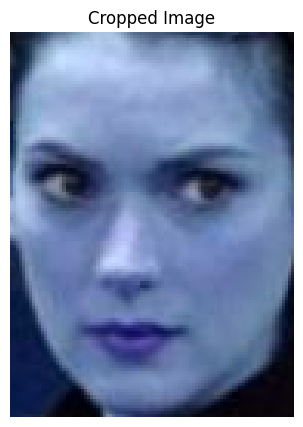

Лицо не обнаружено


: 

In [ ]:
def identity_face(img, model, df):
    res = []
    photo = cv2.imread(img)
    res_detect = model.predict(photo)
    if len(res_detect[0].boxes) == 1:

        x1, y1, x2, y2 = map(int, res_detect[0].boxes.xyxy[0])
        crop_ph = photo[y1:y2, x1:x2]
        # crop =cv2.cvtColor(crop_ph, cv2.COLOR_BAYER_BGGR2RGB)
        plt.figure(figsize=(5, 5))
        plt.imshow(crop_ph)
        plt.title("Cropped Image")               # отображение обрезанной части картинки
        plt.axis('off')
        plt.show()
        try:
            embedding_input = DeepFace.represent(img_path = crop_ph, model_name='VGG-Face')
            max_prob = 0
            best_res = None
            for i, list(embedding_db) in enumerate(df['embedding']):
                similarity = cosine_similarity([embedding_input], [embedding_db])[0][0]
                if similarity > max_prob:
                    max_prob = similarity
                    best_res = df.iloc[i]

            if best_res is not None:
                res = {'Name': best_res['Name'], 'similarity': max_prob}
                print(f'Имя: {res["Name"]}\nСовпадение: {res["similarity"]}')
                return res
            else:
                print('Совпадения не найдены')
                return None
        except:
            print('Лицо не обнаружено')
            return None
    else:
        print('Ошибка, обнаружено много лиц. Пожалйста, выберите фото с одним лицом.')
        return None
identity_face(r'id_data\train\Winona_Ryder\Winona_Ryder_0008.jpg', model_v8_s20, traindf)

In [38]:
identity_face(r'id_data\train\Adrien_Brody\Adrien_Brody_0011.jpg', model_v8_s20, traindf)


0: 640x640 1 face, 245.0ms
Speed: 8.2ms preprocess, 245.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


AttributeError: 'list' object has no attribute 'box'